空調条件データ準備

In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
df_office = pd.read_csv('./data/summary_20230112.csv')
df_office

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,b,2504.354667
903,office33_960_246_aout,office33,960.0,246.0,a,1331.682000
904,office33_960_246_bout,office33,960.0,246.0,b,1495.644000
905,office33_960_82_aout,office33,960.0,82.0,a,2227.621000


In [3]:
df_total = pd.get_dummies(df_office, columns=['exhaust'])
df_total = df_total.set_index('case_name')
df_total

,office,aircon,ventilation,countTimeMean_onlyFloating,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,,,
office1_0_0,office1,0.0,0.0,2991.405667,False,False,True
office1_0_123_aout,office1,0.0,123.0,2656.982333,True,False,False
office1_0_123_bout,office1,0.0,123.0,2951.144667,False,True,False
office1_0_164_aout,office1,0.0,164.0,2470.395667,True,False,False
office1_0_164_bout,office1,0.0,164.0,3271.053000,False,True,False
...,...,...,...,...,...,...,...
office33_960_164_bout,office33,960.0,164.0,2504.354667,False,True,False
office33_960_246_aout,office33,960.0,246.0,1331.682000,True,False,False
office33_960_246_bout,office33,960.0,246.0,1495.644000,False,True,False


In [4]:
df_total.std(numeric_only=True)

aircon                        358.283680
ventilation                    84.242823
countTimeMean_onlyFloating    564.993977
exhaust_a                       0.495347
exhaust_b                       0.495347
exhaust_off                     0.347201
dtype: float64

In [5]:
# 空調条件データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[['aircon', 'ventilation', 'exhaust_a', 'exhaust_b', 'exhaust_off']]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
df_meta_standardized

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510
...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510


In [6]:
# 機械学習に用いるDataFrame
df_ml = df_meta_standardized.join(df_total[['office', 'countTimeMean_onlyFloating']])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252,office1,2991.405667
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510,office1,2656.982333
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510,office1,2951.144667
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510,office1,2470.395667
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
...,...,...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510,office33,2504.354667
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510,office33,1331.682000
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510,office33,1495.644000


In [7]:
# 各officeから3パターンずつtestデータとして抜き出す

def split_DataFrame(df_core:pd.DataFrame):
    df_test = pd.DataFrame()
    for office in df_core['office'].unique():
        df = df_core[df_core['office']==office].sample(n=3, random_state=0)
        df_test = pd.concat([df_test, df])
        
    df_train = df_core[~df_core.index.isin(df_test.index)]
        
    return df_train, df_test
        
df_fit, df_test = split_DataFrame(df_ml)

In [8]:
df_test

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
office1_960_123_bout,1.293167,-0.204554,-0.868534,1.151365,-0.403510,office1,1546.898667
office1_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office1,999.284000
office2_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office2,2322.241333
office2_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office2,2461.452000
...,...,...,...,...,...,...,...
office32_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office32,2489.653333
office32_660_0,0.455379,-1.665425,-0.868534,-0.868534,2.478252,office32,3753.406000
office33_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office33,2137.150000


点群データ準備

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# 三次元点群を描画する関数
def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=1.0, s=1)
    ax.set_aspect('equal')
    plt.show()

In [11]:
point_cloud_dict = np.load('./data/point_cloud_dict.npy', allow_pickle=True).item()
point_cloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

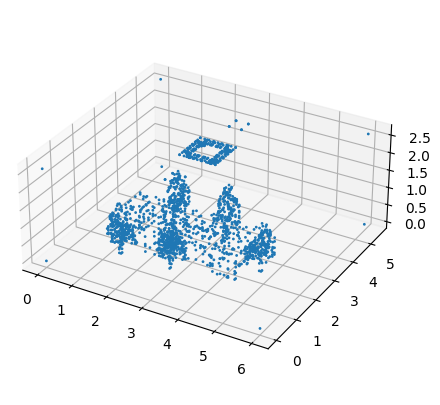

In [12]:
plot3d_points(point_cloud_dict['office1'])

In [13]:
point_cloud_list = []
for i in range(33):
    if i==29:
        continue
    point_cloud_list.append(point_cloud_dict[f'office{i+1}'])

point_cloud_array = np.array(point_cloud_list)

point_cloud_array.shape

(32, 2048, 3)

In [14]:
point_cloud_array_reshape = point_cloud_array.reshape(-1,3)
point_cloud_array_reshape.shape

(65536, 3)

In [15]:
x_mean = []
x_std = []

for i in range(3):
    x_mean.append(np.mean(point_cloud_array_reshape[:,i]))
    x_std.append(np.std(point_cloud_array_reshape[:,i], ddof=0))

print(x_mean)
print(x_std)

[4.060322, 2.6875114, 1.2308416]
[1.9615167, 1.2216018, 0.92776775]


In [16]:
# 3次元点群の標準化定義
def standardization(array:np.array, x_mean, x_std):
    array_std = array.copy()
    for i in range(3):
        array_std[:,i] = (array[:,i] - x_mean[i]) / x_std[i]
    return array_std

空調条件データと点群データを辞書として結合

In [17]:
point_cloud_fit_list = []
for office in df_fit['office']:
    point_cloud_fit_list.append(standardization(point_cloud_dict[office], x_mean, x_std))
point_cloud_fit = np.array(point_cloud_fit_list)

point_cloud_test_list = []
for office in df_test['office']:
    point_cloud_test_list.append(standardization(point_cloud_dict[office], x_mean, x_std))
point_cloud_test = np.array(point_cloud_test_list)

print(point_cloud_fit.shape)
print(point_cloud_test.shape)

(811, 2048, 3)
(96, 2048, 3)


In [18]:
office_X_dict_fit = {'meta' : df_fit[['aircon','ventilation','exhaust_a','exhaust_b','exhaust_off']],
              'pointCloud' : point_cloud_fit}

office_X_dict_test = {'meta' : df_test[['aircon','ventilation','exhaust_a','exhaust_b','exhaust_off']],
              'pointCloud' : point_cloud_test}

office_y_fit = df_fit['countTimeMean_onlyFloating']
office_y_test = df_test['countTimeMean_onlyFloating']

officeデータのみで学習

In [19]:
import keras
from keras.callbacks import EarlyStopping

In [20]:
load_weights = True

model_str = open('./data/optuna_best_model.json').read()
model = keras.models.model_from_json(model_str)

if load_weights:
    model.load_weights('./data/only_office_best_weights.hdf5')

model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # optunaの探索結果
            loss='mse',
            metrics=['mae'],
            )

model.summary()

Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 2048, 32)    128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2048, 32)     0           ['batch_normalization

In [21]:
if not load_weights:
    history = model.fit(
            office_X_dict_fit, office_y_fit,
            validation_data = (office_X_dict_test, office_y_test),
            epochs = 1000,
            batch_size=64,  # optunaの探索結果
            callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100, restore_best_weights=True,)])

scan1~6データ準備

In [22]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

NUM_POINTS = 2048

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [23]:
# scan1~6の点群を作成

load_scan1_6_points = True

if load_scan1_6_points:
    scan1_6_points = np.load('./data/scan1_6_points.npy', allow_pickle=True)

else:
    scan_points = []

    for i in range(6):
        mesh_full = o3d.io.read_triangle_mesh(f'./data/scan1_6/scan_{i+1}_edit.stl')
        mesh_inside = o3d.io.read_triangle_mesh(f'./data/scan1_6/scan_{i+1}_trim.stl')

        point_cloud = mesh_full.sample_points_poisson_disk(number_of_points=10000)
        points_for_corners = np.array(point_cloud.points)

        x_min = min(points_for_corners[:,0])    # 直方体の部屋の隅（8箇所）の座標を取得
        x_max = max(points_for_corners[:,0])
        y_min = min(points_for_corners[:,1])
        y_max = max(points_for_corners[:,1])
        z_min = min(points_for_corners[:,2])
        z_max = max(points_for_corners[:,2])

        # print(x_min, x_max, y_min, y_max, z_min, z_max)

        corner_1 = np.array([[x_min, y_min, z_min]])
        corner_2 = np.array([[x_max, y_min, z_min]])
        corner_3 = np.array([[x_min, y_max, z_min]])
        corner_4 = np.array([[x_max, y_max, z_min]])
        corner_5 = np.array([[x_min, y_min, z_max]])
        corner_6 = np.array([[x_max, y_min, z_max]])
        corner_7 = np.array([[x_min, y_max, z_max]])
        corner_8 = np.array([[x_max, y_max, z_max]])

        corner_points = np.concatenate([corner_1, corner_2, corner_3, corner_4, corner_5, corner_6, corner_7, corner_8], axis=0)

        point_cloud = mesh_inside.sample_points_poisson_disk(number_of_points=NUM_POINTS-8) # メッシュから点群を作成（ポアソンディスクサンプリング）
        inside_points = np.array(point_cloud.points)

        points = np.concatenate([corner_points, inside_points], axis=0)

        scan_points.append(points)

    scan1_6_points = np.array(scan_points)

In [24]:
# スキャンしたまんまの未処理データ（向きがめちゃくちゃ）を使う場合

# scan_points = []

# for i in range(6):
#     mesh = o3d.io.read_triangle_mesh(f'./stl/scan_{i+1}.stl')
#     point_cloud = mesh.sample_points_poisson_disk(number_of_points=NUM_POINTS)
#     points_for_corners = np.array(point_cloud.points)

#     scan_points.append(points)

# scan_points = np.array(scan_points)

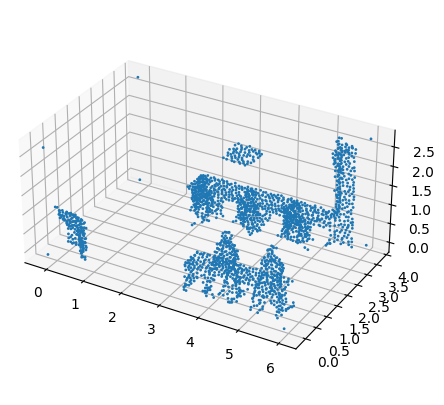

In [25]:
plot3d_points(scan1_6_points[0])

In [26]:
# 標準化

scan1_6_points_std = []
for i in range(scan1_6_points.shape[0]):
    scan1_6_points_std.append(standardization(scan1_6_points[i], x_mean, x_std))

scan1_6_points_std = np.array(scan1_6_points_std)

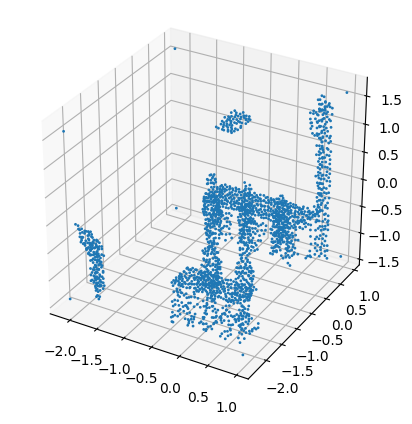

In [27]:
plot3d_points(scan1_6_points_std[0])

空調条件データと合わせる

In [28]:
# 空調条件データ（標準化済）読み込み
meta_array = df_ml[df_ml['office']=='office2'][['aircon', 'ventilation', 'exhaust_a', 'exhaust_b', 'exhaust_off']].values
meta_array

array([[-1.38775264, -1.66542468, -0.86853442, -0.86853442,  2.47825186],
       [-1.38775264,  0.28240277,  1.15136485, -0.86853442, -0.40351024],
       [-1.38775264,  0.28240277, -0.86853442,  1.15136485, -0.40351024],
       [-1.38775264,  1.25631649,  1.15136485, -0.86853442, -0.40351024],
       [-1.38775264,  1.25631649, -0.86853442,  1.15136485, -0.40351024],
       [-1.38775264, -0.69151096,  1.15136485, -0.86853442, -0.40351024],
       [-1.38775264, -0.69151096, -0.86853442,  1.15136485, -0.40351024],
       [-0.38240787, -1.66542468, -0.86853442, -0.86853442,  2.47825186],
       [-0.38240787,  0.28240277,  1.15136485, -0.86853442, -0.40351024],
       [-0.38240787,  0.28240277, -0.86853442,  1.15136485, -0.40351024],
       [-0.38240787,  1.25631649,  1.15136485, -0.86853442, -0.40351024],
       [-0.38240787,  1.25631649, -0.86853442,  1.15136485, -0.40351024],
       [-0.38240787, -0.69151096,  1.15136485, -0.86853442, -0.40351024],
       [-0.38240787, -0.69151096, -0.8

In [29]:
# 空調条件データと点群データを辞書として結合

scan1_6_X_dict_list = []

for i in range(scan1_6_points.shape[0]):
    point_cloud_list = []
    for j in range(meta_array.shape[0]):
        point_cloud_list.append(scan1_6_points_std[i]) # 空調条件のパターン数だけ点群を複製

    X_dict = {'meta' : meta_array,
              'pointCloud' : np.array(point_cloud_list)}

    scan1_6_X_dict_list.append(X_dict)

In [30]:
scan1_6_X_dict_list[0]

{'meta': array([[-1.38775264, -1.66542468, -0.86853442, -0.86853442,  2.47825186],
        [-1.38775264,  0.28240277,  1.15136485, -0.86853442, -0.40351024],
        [-1.38775264,  0.28240277, -0.86853442,  1.15136485, -0.40351024],
        [-1.38775264,  1.25631649,  1.15136485, -0.86853442, -0.40351024],
        [-1.38775264,  1.25631649, -0.86853442,  1.15136485, -0.40351024],
        [-1.38775264, -0.69151096,  1.15136485, -0.86853442, -0.40351024],
        [-1.38775264, -0.69151096, -0.86853442,  1.15136485, -0.40351024],
        [-0.38240787, -1.66542468, -0.86853442, -0.86853442,  2.47825186],
        [-0.38240787,  0.28240277,  1.15136485, -0.86853442, -0.40351024],
        [-0.38240787,  0.28240277, -0.86853442,  1.15136485, -0.40351024],
        [-0.38240787,  1.25631649,  1.15136485, -0.86853442, -0.40351024],
        [-0.38240787,  1.25631649, -0.86853442,  1.15136485, -0.40351024],
        [-0.38240787, -0.69151096,  1.15136485, -0.86853442, -0.40351024],
        [-0.38240

PointNetに入力

In [31]:
scan1_6_pred_y_list = []

for i in range(6):
    pred_y = model.predict(scan1_6_X_dict_list[i])
    scan1_6_pred_y_list.append(pred_y.reshape((pred_y.shape[0])))

1/1 [==============================] - 0s 61ms/step


結果プロット

officeモデルの計算値と比較

In [32]:
office_names = df_ml['office'].unique()
office_names

array(['office1', 'office2', 'office3', 'office4', 'office5', 'office6',
       'office7', 'office8', 'office9', 'office10', 'office11',
       'office12', 'office13', 'office14', 'office15', 'office16',
       'office17', 'office18', 'office19', 'office20', 'office21',
       'office22', 'office23', 'office24', 'office25', 'office26',
       'office27', 'office28', 'office30', 'office31', 'office32',
       'office33'], dtype=object)

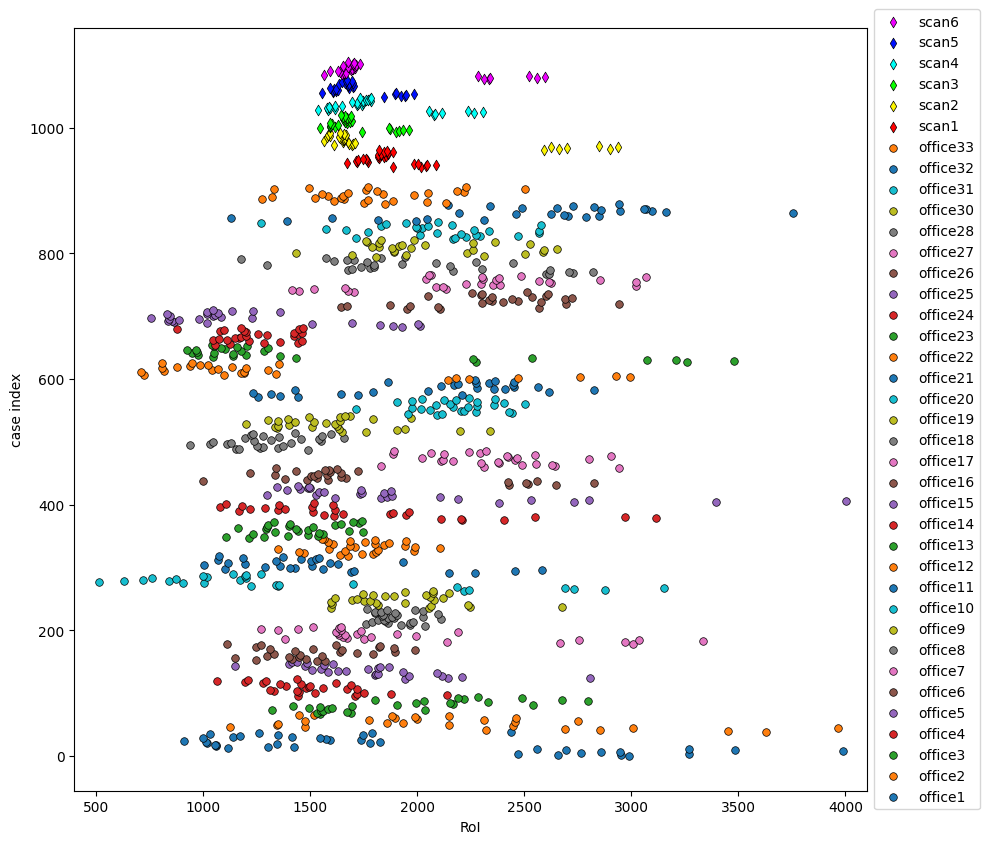

In [33]:
plt.figure(figsize=(10, 9))

cmap = plt.get_cmap('tab10')
y_start = 0
for i, office in enumerate(office_names):
    x = df_ml[df_ml['office']==office]['countTimeMean_onlyFloating']
    y = list(range(y_start, y_start+x.shape[0]))
    y_start = y[-1] + 1
    plt.scatter(x, y, color=cmap((i%10)/10), edgecolor='k', linewidth=0.5, s=30, label=office)

cmap = plt.get_cmap('hsv')
y_start += 30
for i in range(6):
    x = scan1_6_pred_y_list[i]
    y = list(range(y_start, y_start+x.shape[0]))
    y_start = y[-1] + 1
    plt.scatter(x, y, marker='d', color=cmap(i/6), edgecolor='k', linewidth=0.5, s=30, label=f'scan{i+1}')

plt.xlim(400, 4100)
plt.xlabel('RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

officeモデルの予測値と比較

In [34]:
office_pred_y_fit = model.predict(office_X_dict_fit)
office_pred_y_test = model.predict(office_X_dict_test)

office_pred_y_fit = office_pred_y_fit.reshape(office_pred_y_fit.shape[0])
office_pred_y_test = office_pred_y_test.reshape(office_pred_y_test.shape[0])

3/3 [==============================] - 0s 20ms/step


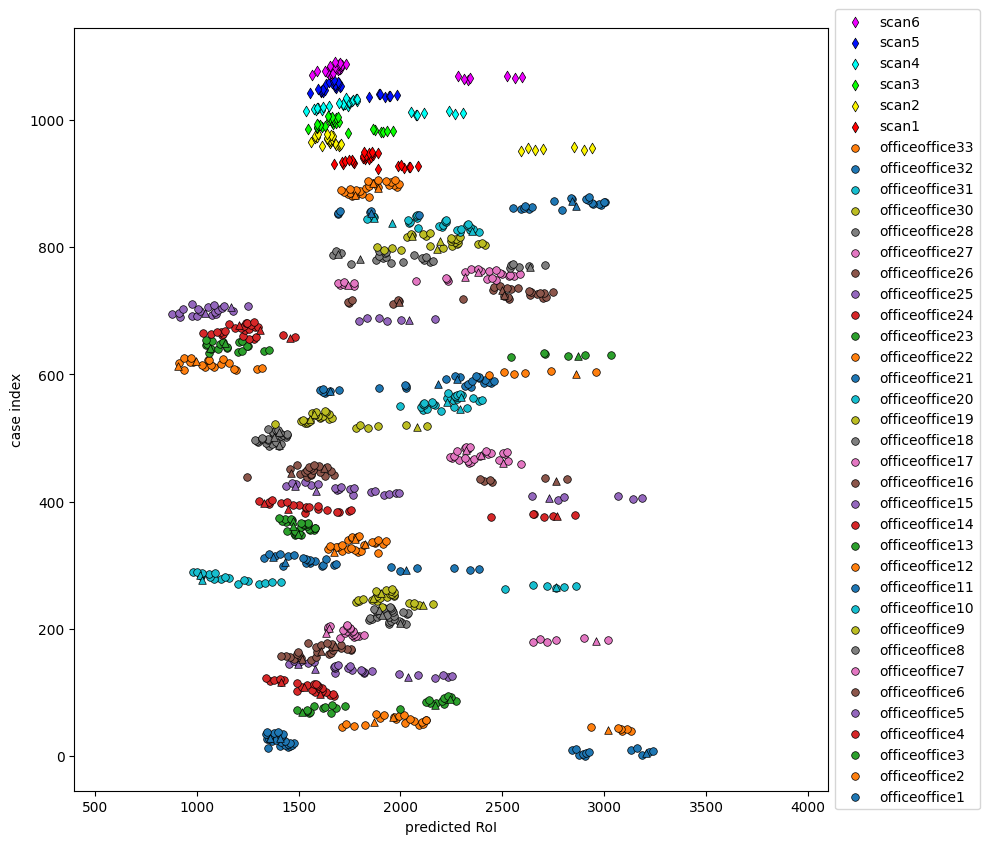

In [35]:
plt.figure(figsize=(10, 9))

cmap = plt.get_cmap('tab10')

df_fit_tmp = df_fit.reset_index()
for i, office in enumerate(office_names):
    df = df_fit_tmp[df_fit_tmp['office']==office]
    y = []
    for idx in df['case_name']:
        y.append(df_office[df_office['case_name']==idx].index[0])
    x = office_pred_y_fit[df.index]
    plt.scatter(x, y, color=cmap((i%10)/10), edgecolor='k', lw=0.5, s=30, label=f'office{office}')

df_test_tmp = df_test.reset_index()
for i, office in enumerate(office_names):
    df = df_test_tmp[df_test_tmp['office']==office]
    y = []
    for idx in df['case_name']:
        y.append(df_office[df_office['case_name']==idx].index[0])
    x = office_pred_y_test[df.index]
    plt.scatter(x, y, color=cmap((i%10)/10), marker='^', edgecolor='k', lw=0.5, s=30)

cmap = plt.get_cmap('hsv')

ye = y[-1] + 30
for i in range(scan1_6_points.shape[0]):
    ys = ye
    ye = ys + meta_array.shape[0]
    y = list(range(ys, ye))
    x = scan1_6_pred_y_list[i]
    plt.scatter(x, y, marker='d', color=cmap(i/6), edgecolor='k', linewidth=0.5, s=30, label=f'scan{i+1}')

plt.xlim(400, 4100)
plt.xlabel('predicted RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

富岳計算用に作成したscan1モデル（scan1_fugaku）を追加

In [36]:
# scan1_fugakuの点群を作成
load_scan1_fugaku_points = True

if load_scan1_fugaku_points:
    scan1_fugaku_points = np.load('./data/scan1_fugaku/scan1_fugaku_points.npy', allow_pickle=True)

else:
    mesh1 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/aircon_body.stl')
    mesh2 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/aircon_inlets.stl')
    mesh3 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/aircon_outlet.stl')
    mesh4 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/airvent_a.stl')
    mesh5 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/airvent_b.stl')
    mesh6 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/bodies.stl')
    mesh7 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/desks.stl')
    mesh8 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/pillar.stl')
    mesh9 = o3d.io.read_triangle_mesh(f'./data/scan1_fugaku/washstand.stl')

    mesh = mesh1 + mesh2 + mesh3 + mesh4 + mesh5 + mesh6 + mesh7 + mesh8 + mesh9

    x_min = 0
    x_max = 5.8
    y_min = 0
    y_max = 3.8
    z_min = 0
    z_max = 2.6

    corner_1 = np.array([[x_min, y_min, z_min]])
    corner_2 = np.array([[x_max, y_min, z_min]])
    corner_3 = np.array([[x_min, y_max, z_min]])
    corner_4 = np.array([[x_max, y_max, z_min]])
    corner_5 = np.array([[x_min, y_min, z_max]])
    corner_6 = np.array([[x_max, y_min, z_max]])
    corner_7 = np.array([[x_min, y_max, z_max]])
    corner_8 = np.array([[x_max, y_max, z_max]])

    corner_points = np.concatenate([corner_1, corner_2, corner_3, corner_4, corner_5, corner_6, corner_7, corner_8], axis=0)

    point_cloud = mesh.sample_points_poisson_disk(number_of_points=NUM_POINTS-8)
    inside_points = np.array(point_cloud.points)

    scan1_fugaku_points = np.concatenate([corner_points, inside_points], axis=0)

In [37]:
# 標準化
scan1_fugaku_points_std = standardization(scan1_fugaku_points, x_mean, x_std)

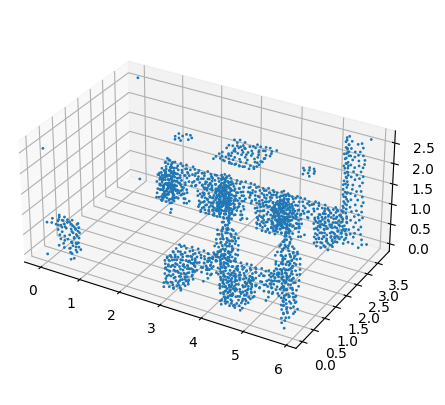

In [38]:
plot3d_points(scan1_fugaku_points)

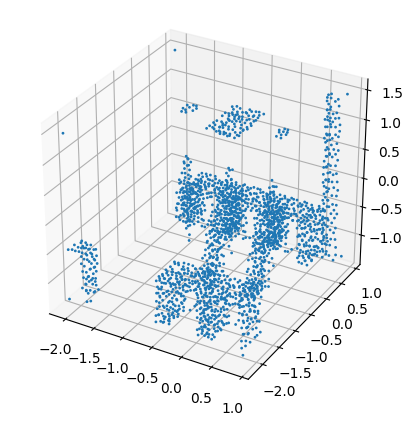

In [39]:
plot3d_points(scan1_fugaku_points_std)

In [40]:
point_cloud_list = []
for i in range(meta_array.shape[0]):
    point_cloud_list.append(scan1_fugaku_points_std)

scan1_fugaku_X_dict = {'meta' : meta_array,
                       'pointCloud' : np.array(point_cloud_list)}

In [41]:
scan1_fugaku_pred_y = model.predict(scan1_fugaku_X_dict)

1/1 [==============================] - 0s 48ms/step


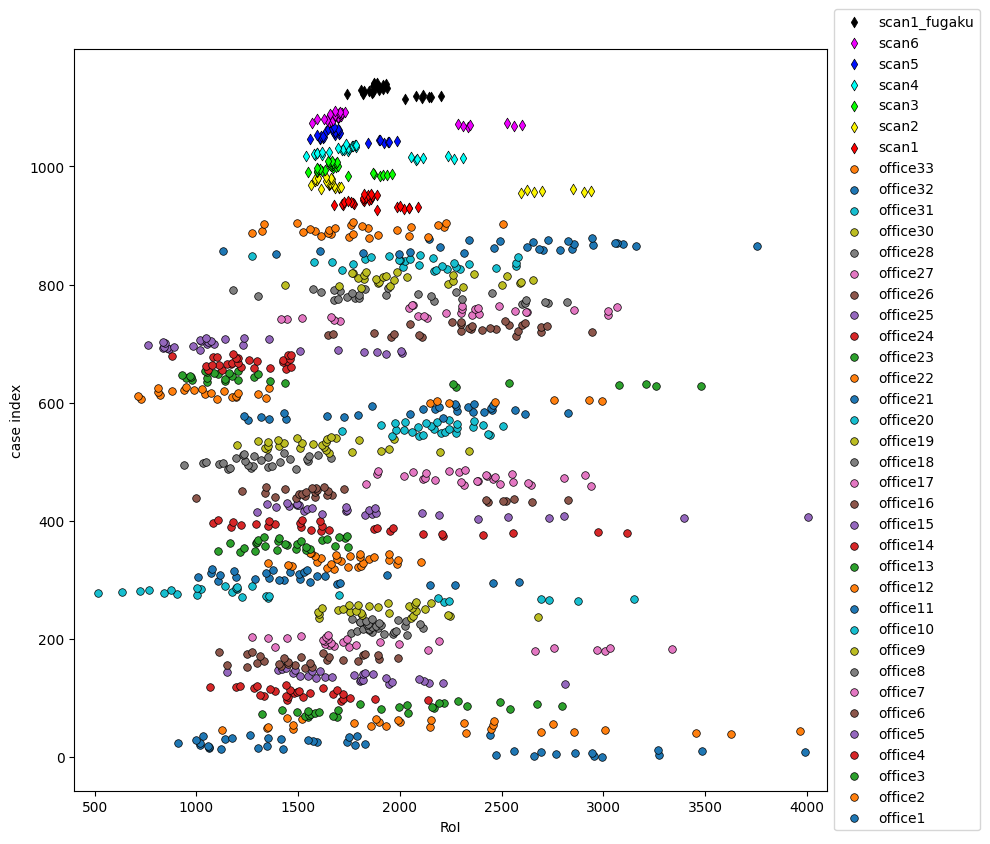

In [42]:
# officeモデルの計算値と比較

plt.figure(figsize=(10, 9))

cmap = plt.get_cmap('tab10')
y_start = 0
for i, office in enumerate(office_names):
    x = df_ml[df_ml['office']==office]['countTimeMean_onlyFloating']
    y = list(range(y_start, y_start+x.shape[0]))
    y_start = y[-1] + 1
    plt.scatter(x, y, color=cmap((i%10)/10), edgecolor='k', linewidth=0.5, s=30, label=office)

cmap = plt.get_cmap('hsv')
y_start += 20
for i in range(6):
    x = scan1_6_pred_y_list[i]
    y = list(range(y_start, y_start+x.shape[0]))
    y_start = y[-1] + 1
    plt.scatter(x, y, marker='d', color=cmap(i/6), edgecolor='k', linewidth=0.5, s=30, label=f'scan{i+1}')

x = scan1_fugaku_pred_y
y_start += 20
y = list(range(y_start, y_start+x.shape[0]))
plt.scatter(x, y, marker='d', color='k', edgecolor='k', linewidth=0.5, s=30, label='scan1_fugaku')

plt.xlim(400, 4100)
plt.xlabel('RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

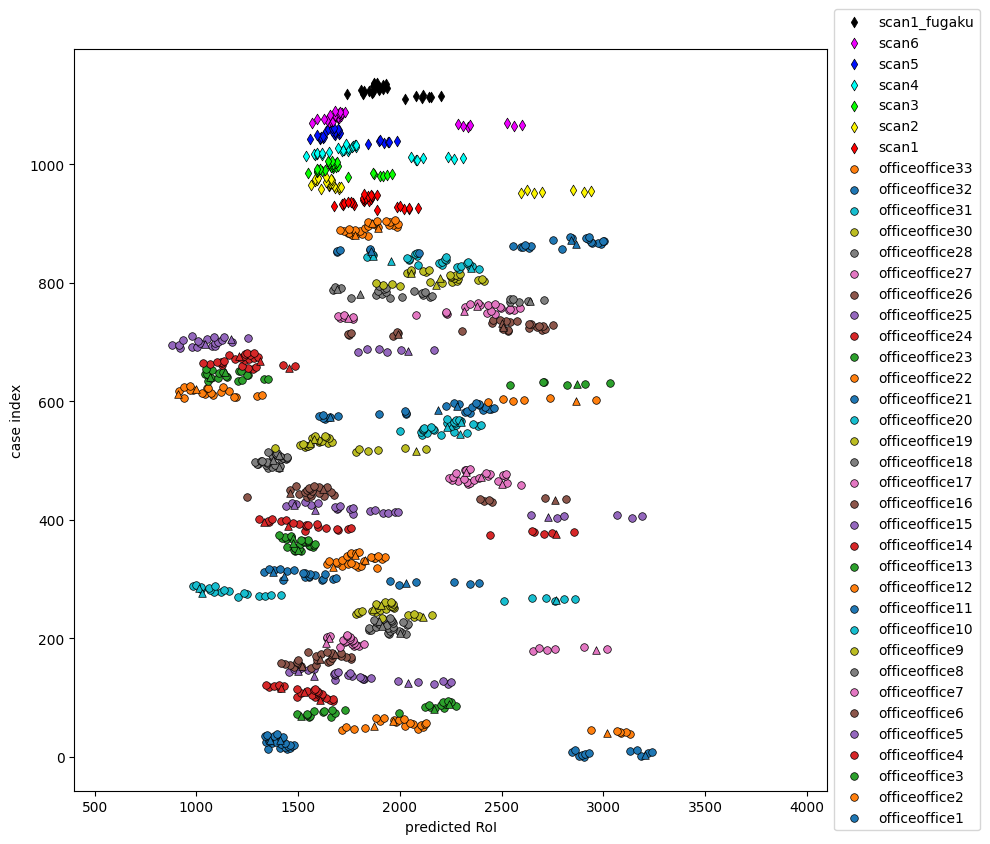

In [43]:
# officeモデルの予測値と比較

plt.figure(figsize=(10, 9))

cmap = plt.get_cmap('tab10')

df_fit_tmp = df_fit.reset_index()
for i, office in enumerate(office_names):
    df = df_fit_tmp[df_fit_tmp['office']==office]
    y = []
    for idx in df['case_name']:
        y.append(df_office[df_office['case_name']==idx].index[0])
    x = office_pred_y_fit[df.index]
    plt.scatter(x, y, color=cmap((i%10)/10), edgecolor='k', lw=0.5, s=30, label=f'office{office}')

df_test_tmp = df_test.reset_index()
for i, office in enumerate(office_names):
    df = df_test_tmp[df_test_tmp['office']==office]
    y = []
    for idx in df['case_name']:
        y.append(df_office[df_office['case_name']==idx].index[0])
    x = office_pred_y_test[df.index]
    plt.scatter(x, y, color=cmap((i%10)/10), marker='^', edgecolor='k', lw=0.5, s=30)

cmap = plt.get_cmap('hsv')

ye = y[-1] + 30
for i in range(scan1_6_points.shape[0]):
    ys = ye
    ye = ys + meta_array.shape[0]
    y = list(range(ys, ye))
    x = scan1_6_pred_y_list[i]
    plt.scatter(x, y, marker='d', color=cmap(i/6), edgecolor='k', linewidth=0.5, s=30, label=f'scan{i+1}')

x = scan1_fugaku_pred_y
ys = ye + 20
ye = ys + meta_array.shape[0]
y = list(range(ys, ye))
plt.scatter(x, y, marker='d', color='k', edgecolor='k', linewidth=0.5, s=30, label='scan1_fugaku')

plt.xlim(400, 4100)
plt.xlabel('predicted RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

scan1_fugaku計算結果

In [44]:
df_scan1_fugaku = pd.read_csv("./data/summary_scan1.csv")
df_scan1_fugaku.rename(columns={'Unnamed: 0':'case_name'}, inplace=True)
df_scan1_fugaku.drop(['1_x','1_y','1_angle','2_x','2_y','2_angle','3_x','3_y','3_angle','4_x','4_y','4_angle','5_x','5_y','5_angle','size_x','size_y'], axis=1, inplace=True)

def add_prefix(text):
    prefix = 'scan1_'
    return prefix + text

df_scan1_fugaku['case_name'] = df_scan1_fugaku['case_name'].apply(add_prefix)
df_scan1_fugaku = df_scan1_fugaku.set_index('case_name')

df_scan1_fugaku

,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
case_name,,,,,
scan1_0_0,scan1,0,0,off,1757.936667
scan1_0_164_aout,scan1,0,164,a,1869.638333
scan1_0_164_bout,scan1,0,164,b,1362.842000
scan1_0_246_aout,scan1,0,246,a,1542.956667
scan1_0_246_bout,scan1,0,246,b,1825.899000
scan1_0_82_aout,scan1,0,82,a,1967.014333
scan1_0_82_bout,scan1,0,82,b,1744.621000
scan1_360_0,scan1,360,0,off,1650.899000
scan1_360_164_aout,scan1,360,164,a,1652.457667


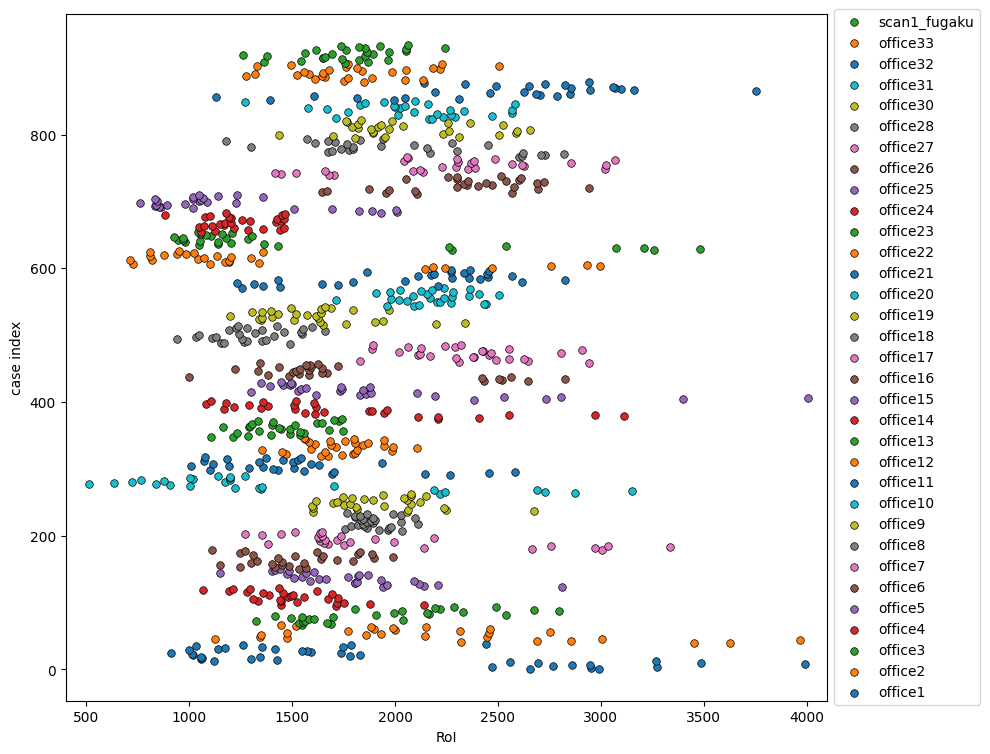

In [45]:
# officeの富岳計算結果と比較

plt.figure(figsize=(10, 8))

cmap = plt.get_cmap('tab10')
y_start = 0
for i, office in enumerate(office_names):
    x = df_ml[df_ml['office']==office]['countTimeMean_onlyFloating']
    y = list(range(y_start, y_start+x.shape[0]))
    y_start = y[-1] + 1
    plt.scatter(x, y, color=cmap((i%10)/10), edgecolor='k', linewidth=0.5, s=30, label=office)

x = df_scan1_fugaku['countTimeMean_onlyFloating']
y = list(range(y_start, y_start+x.shape[0]))
plt.scatter(x, y, color=cmap((2%10)/10), edgecolor='k', linewidth=0.5, s=30, label='scan1_fugaku')

plt.xlim(400, 4100)
plt.xlabel('RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

学習データにscan1_fugakuを加えて再学習

In [46]:
df_scan1_fugaku_ml = pd.DataFrame(meta_array, columns=['aircon', 'ventilation', 'exhaust_a', 'exhaust_b', 'exhaust_off'], index=df_scan1_fugaku.index)
df_scan1_fugaku_ml = pd.concat([df_scan1_fugaku_ml, df_scan1_fugaku[['office', 'countTimeMean_onlyFloating']]], axis=1)
df_scan1_fugaku_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
scan1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252,scan1,1757.936667
scan1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510,scan1,1869.638333
scan1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,scan1,1362.842000
scan1_0_246_aout,-1.387753,1.256316,1.151365,-0.868534,-0.403510,scan1,1542.956667
scan1_0_246_bout,-1.387753,1.256316,-0.868534,1.151365,-0.403510,scan1,1825.899000
scan1_0_82_aout,-1.387753,-0.691511,1.151365,-0.868534,-0.403510,scan1,1967.014333
scan1_0_82_bout,-1.387753,-0.691511,-0.868534,1.151365,-0.403510,scan1,1744.621000
scan1_360_0,-0.382408,-1.665425,-0.868534,-0.868534,2.478252,scan1,1650.899000
scan1_360_164_aout,-0.382408,0.282403,1.151365,-0.868534,-0.403510,scan1,1652.457667


In [47]:
df_all_ml = pd.concat([df_ml, df_scan1_fugaku_ml], axis=0)
df_all_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252,office1,2991.405667
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510,office1,2656.982333
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510,office1,2951.144667
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510,office1,2470.395667
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
...,...,...,...,...,...,...,...
scan1_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510,scan1,1852.020000
scan1_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510,scan1,1825.473333
scan1_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510,scan1,1924.897333


In [48]:
df_all_fit, df_all_test = split_DataFrame(df_all_ml)

In [49]:
df_all_test

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
office1_960_123_bout,1.293167,-0.204554,-0.868534,1.151365,-0.403510,office1,1546.898667
office1_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office1,999.284000
office2_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office2,2322.241333
office2_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office2,2461.452000
...,...,...,...,...,...,...,...
office33_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office33,1761.043333
office33_660_0,0.455379,-1.665425,-0.868534,-0.868534,2.478252,office33,1985.264333
scan1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,scan1,1362.842000


In [50]:
# officeデータの分け方が同じか確認
a = df_test.index
b = df_all_test.index[:-3]

for i in range(a.shape[0]):
    if a[i]!=b[i]:
        print('error')

In [51]:
point_cloud_fit_list = []
for office in df_fit['office']:
    point_cloud_fit_list.append(standardization(point_cloud_dict[office], x_mean, x_std))
for i in range(meta_array.shape[0]-3):
    point_cloud_fit_list.append(scan1_fugaku_points_std)
point_cloud_fit = np.array(point_cloud_fit_list)

point_cloud_test_list = []
for office in df_test['office']:
    point_cloud_test_list.append(standardization(point_cloud_dict[office], x_mean, x_std))
for i in range(3):
    point_cloud_test_list.append(scan1_fugaku_points_std)
point_cloud_test = np.array(point_cloud_test_list)

print(point_cloud_fit.shape)
print(point_cloud_test.shape)

(836, 2048, 3)
(99, 2048, 3)


In [52]:
all_X_dict_fit = {'meta' : df_all_fit[['aircon','ventilation','exhaust_a','exhaust_b','exhaust_off']],
                  'pointCloud' : point_cloud_fit}

all_X_dict_test = {'meta' : df_all_test[['aircon','ventilation','exhaust_a','exhaust_b','exhaust_off']],
                   'pointCloud' : point_cloud_test}

all_y_fit = df_all_fit['countTimeMean_onlyFloating']
all_y_test = df_all_test['countTimeMean_onlyFloating']

In [53]:
load_weights = True

model_str = open('./data/optuna_best_model.json').read()
new_model = keras.models.model_from_json(model_str)

if load_weights:
    new_model.load_weights('./data/with_scan1_best_weights.hdf5')

new_model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # optunaの探索結果
            loss='mse',
            metrics=['mae'],
            )

new_model.summary()

Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 2048, 32)    128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2048, 32)     0           ['batch_normalization

In [54]:
if not load_weights:
    history = new_model.fit(
            all_X_dict_fit, all_y_fit,
            validation_data = (all_X_dict_test, all_y_test),
            epochs = 1000,
            batch_size=64,  # optunaの探索結果
            callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100, restore_best_weights=True)])

scan1_fugakuの予測結果比較

In [55]:
scan1_fugaku_pred_y_new = new_model.predict(scan1_fugaku_X_dict)
scan1_fugaku_pred_y_old = model.predict(scan1_fugaku_X_dict)

scan1_fugaku_pred_y_new = scan1_fugaku_pred_y_new.reshape(scan1_fugaku_pred_y_new.shape[0])
scan1_fugaku_pred_y_old = scan1_fugaku_pred_y_old.reshape(scan1_fugaku_pred_y_old.shape[0])

1/1 [==============================] - 0s 32ms/step


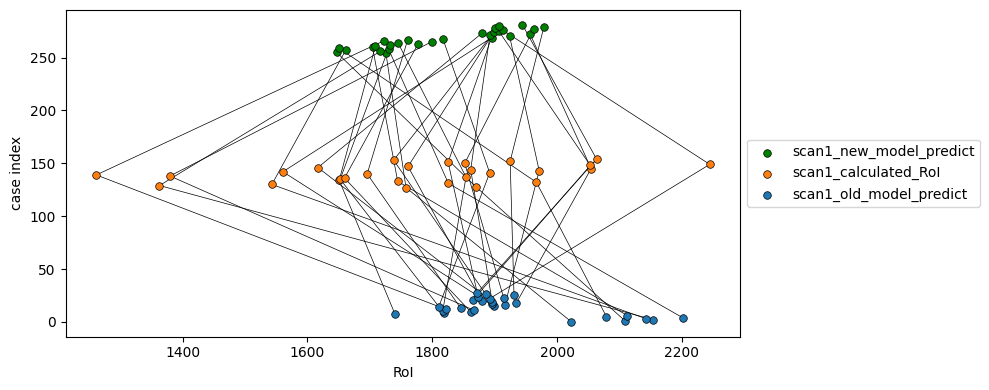

In [56]:
plt.figure(figsize=(10, 4))

case_space = 100

# 空調条件対応関係プロット

space = case_space + df_scan1_fugaku.shape[0] - 1

for i in range(df_scan1_fugaku.shape[0]):
    plt.plot([scan1_fugaku_pred_y_old[i], df_scan1_fugaku['countTimeMean_onlyFloating'][i]], [i, i+space], c='k', lw=0.5, zorder=1)

for i in range(df_scan1_fugaku.shape[0]):
    plt.plot([df_scan1_fugaku['countTimeMean_onlyFloating'][i], scan1_fugaku_pred_y_new[i]], [i+space, i+2*space], c='k', lw=0.5, zorder=1)

# RoIプロット

x = scan1_fugaku_pred_y_old
y = list(range(x.shape[0]))
plt.scatter(x, y, marker='o', s=30, edgecolor='k', linewidth=0.5, label='scan1_old_model_predict', zorder=2)

y_start = np.max(y) + case_space
x = df_scan1_fugaku['countTimeMean_onlyFloating']
y = list(range(x.shape[0]))
y = [x + y_start for x in y]
plt.scatter(x, y, marker='o', s=30, edgecolor='k', linewidth=0.5, label='scan1_calculated_RoI', zorder=2)

y_start = np.max(y) + case_space
x = scan1_fugaku_pred_y_new
y = list(range(x.shape[0]))
y = [x + y_start for x in y]
plt.scatter(x, y, marker='o', s=30, c='g', edgecolor='k', linewidth=0.5, label='scan1_new_model_predict', zorder=2)

plt.xlabel('RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

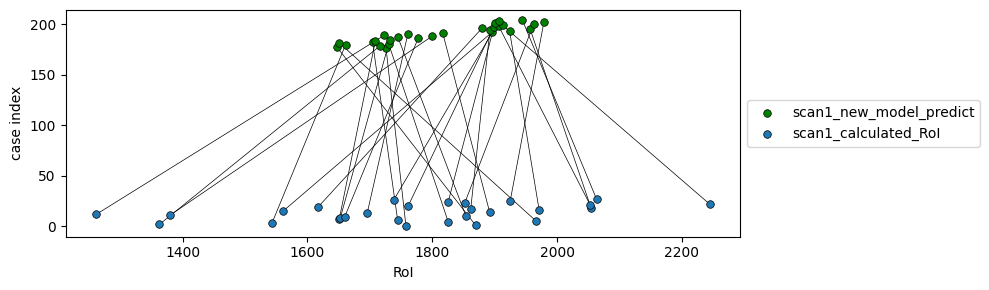

In [57]:
# 富岳の計算値と新モデルの予測値のみでプロット

plt.figure(figsize=(10, 3))

case_space = 150

# 空調条件対応関係プロット

space = case_space + df_scan1_fugaku.shape[0] - 1

for i in range(df_scan1_fugaku.shape[0]):
    plt.plot([df_scan1_fugaku['countTimeMean_onlyFloating'][i], scan1_fugaku_pred_y_new[i]], [i, i+space], c='k', lw=0.5, zorder=1)

# RoIプロット

x = df_scan1_fugaku['countTimeMean_onlyFloating']
y = list(range(x.shape[0]))
plt.scatter(x, y, marker='o', s=30, edgecolor='k', linewidth=0.5, label='scan1_calculated_RoI', zorder=2)

y_start = np.max(y) + case_space
x = scan1_fugaku_pred_y_new
y = list(range(x.shape[0]))
y = [x + y_start for x in y]
plt.scatter(x, y, marker='o', s=30, c='g', edgecolor='k', linewidth=0.5, label='scan1_new_model_predict', zorder=2)

plt.xlabel('RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

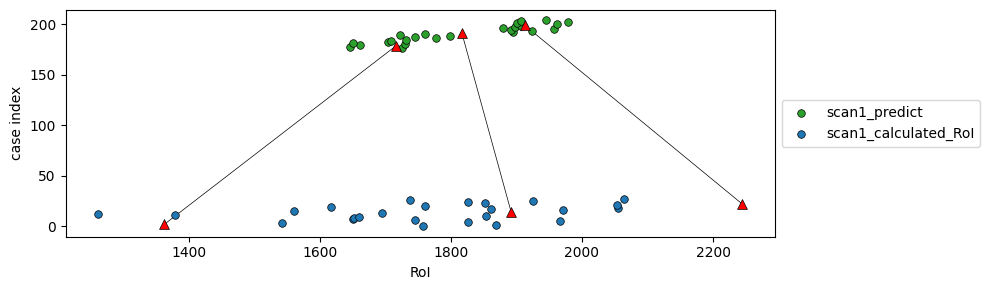

In [58]:
# ↑のテストデータを強調

plt.figure(figsize=(10, 3))

case_space = 150

cmap = plt.get_cmap('tab10')

# 空調条件対応関係プロット

space = case_space + df_scan1_fugaku.shape[0] - 1

for i in range(df_scan1_fugaku.shape[0]):
    if df_scan1_fugaku.index[i] in df_all_test.index:
        plt.plot([df_scan1_fugaku['countTimeMean_onlyFloating'][i], scan1_fugaku_pred_y_new[i]], [i, i+space], c='k', lw=0.5, zorder=1)

# RoIプロット

y_start = 0
x = df_scan1_fugaku['countTimeMean_onlyFloating']
y = list(range(x.shape[0]))
y = [x + y_start for x in y]
for i in range(x.shape[0]-1):
    if df_scan1_fugaku.index[i] in df_all_test.index:
        plt.scatter(x[i], y[i], marker='^', color='r', s=50, edgecolor='k', linewidth=0.5, zorder=3)
    else:
        plt.scatter(x[i], y[i], marker='o', color=cmap(0/10), s=30, edgecolor='k', linewidth=0.5, zorder=3)
plt.scatter(x[-1:], y[-1:], marker='o', color=cmap(0/10), s=30, edgecolor='k', linewidth=0.5, label='scan1_calculated_RoI', zorder=3)

y_start = np.max(y) + case_space
x = scan1_fugaku_pred_y_new
y = list(range(x.shape[0]))
y = [x + y_start for x in y]
for i in range(x.shape[0]-1):
    if df_scan1_fugaku.index[i] in df_all_test.index:
        plt.scatter(x[i], y[i], marker='^', s=50, color='r', edgecolor='k', linewidth=0.5, zorder=3)
    else:
        plt.scatter(x[i], y[i], marker='o', s=30, color=cmap(2/10), edgecolor='k', linewidth=0.5, zorder=2)
plt.scatter(x[-1:], y[-1:], marker='o', s=30, color=cmap(2/10), edgecolor='k', linewidth=0.5, label='scan1_predict', zorder=2)

plt.xlabel('RoI')
plt.ylabel('case index')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

精度

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [60]:
all_pred_y_fit = new_model.predict(all_X_dict_fit)
all_pred_y_test = new_model.predict(all_X_dict_test)

all_pred_y_fit = all_pred_y_fit.reshape(all_pred_y_fit.shape[0])
all_pred_y_test = all_pred_y_test.reshape(all_pred_y_test.shape[0])

4/4 [==============================] - 0s 15ms/step


In [61]:
scan_mae = mean_absolute_error(df_all_test['countTimeMean_onlyFloating'][-3:], all_pred_y_test[-3:])
all_mae = mean_absolute_error(df_all_test['countTimeMean_onlyFloating'], all_pred_y_test)
scan_rmse = np.sqrt(mean_squared_error(df_all_test['countTimeMean_onlyFloating'][-3:], all_pred_y_test[-3:]))
all_rmse = np.sqrt(mean_squared_error(df_all_test['countTimeMean_onlyFloating'], all_pred_y_test))

In [62]:
df_result = pd.DataFrame([[scan_mae, scan_rmse], [all_mae, all_rmse]], columns=['MAE','RMSE'], index=['scan1','all'])
df_result

,MAE,RMSE
scan1,253.664983,283.491148
all,228.195327,296.121524
